## Decision Tree Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Dataset 
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
dataset.target_names

['MedHouseVal']

In [13]:
np.inf

inf

In [5]:
df['MedHouseVal']=dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.shape

(20640, 9)

In [7]:
# take 25% of the data for this Model, to simplify the Test
df = df.sample(frac=0.25)

In [8]:
df.shape

(5160, 9)

In [9]:
# Split in Independent and Dpendent Features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10377,8.7980,10.0,8.187075,1.093537,1808.0,3.074830,33.63,-117.64
19966,2.5156,20.0,5.491379,1.117816,1241.0,3.566092,36.21,-119.08
12457,3.3438,29.0,5.803347,0.987448,671.0,2.807531,33.63,-114.58
3050,2.4961,16.0,5.910448,1.152985,1011.0,3.772388,35.60,-119.34
12080,5.5362,7.0,7.067742,1.045161,1156.0,3.729032,33.83,-117.53


In [11]:
y.head()

10377    4.366
19966    0.593
12457    0.740
3050     0.588
12080    1.956
Name: MedHouseVal, dtype: float64

In [20]:
# Train, Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42, shuffle=True)

In [22]:
# Make the model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor

DecisionTreeRegressor()

In [23]:
# Fit the Model
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
# Predict the Model
y_pred = regressor.predict(X_test)

In [26]:
# Calculate the Accuracy
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.42469793493893016


In [28]:
# Hyperparameter Tuning
parameters = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto', 'sqrt', 'log2']
}

regressor = DecisionTreeRegressor()

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(regressor, param_grid=parameters, cv=5,scoring='neg_mean_squared_error')

In [33]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [34]:
clf.best_params_

{'criterion': 'poisson',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [36]:
# Now use these parametes to make the Model
regressor = DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto', splitter='best')

In [37]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto')

In [38]:
y_pred = regressor.predict(X_test)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred))

0.6300416187232644


In [42]:
mse = mean_squared_error(y_test, y_pred)
mse

0.47744655568164224

In [43]:
rmse = np.sqrt(mse)
rmse

0.6909750760205771

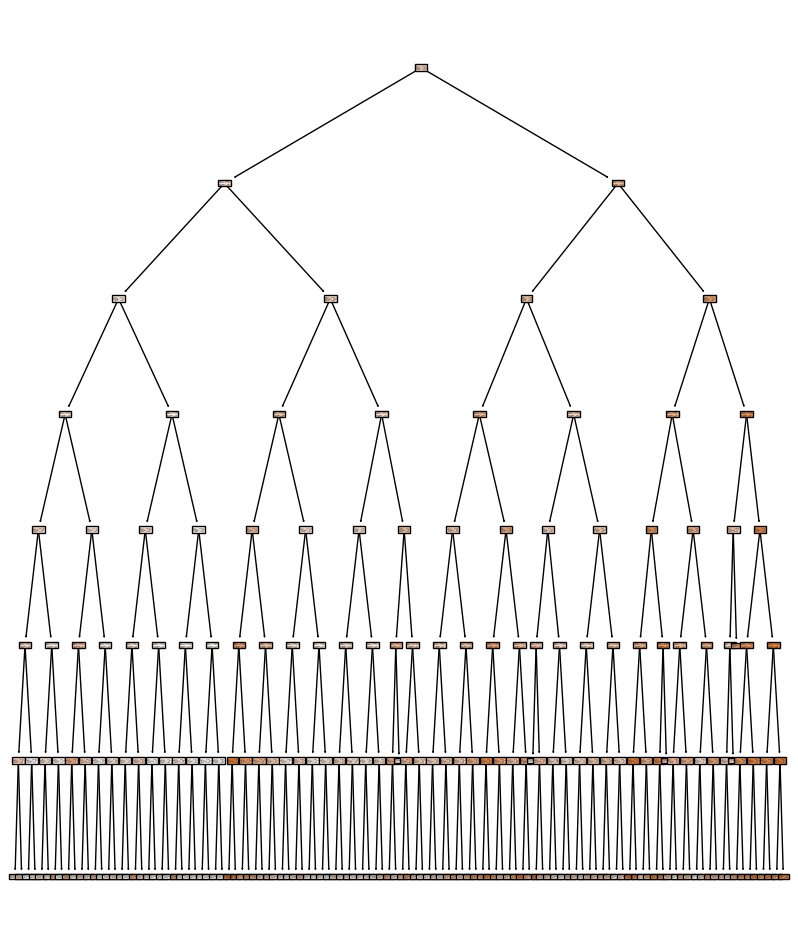

In [44]:
# Now draw the final Decision Tree
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(regressor, filled=True)
plt.show()

In [46]:
# Create Pickle File of the model 
import pickle
file = open('model/DTRegressor.pkl','wb')
pickle.dump(regressor, file)
file.close()

In [47]:
# Load the pickle file
file = open('model/DTRegressor.pkl','rb')
model = pickle.load(file)
file.close()

In [48]:
df.iloc[:1,:-1]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2863,3.5441,14.0,5.980535,1.053528,1352.0,3.289538,35.37,-118.87


In [49]:
model.predict(df.iloc[:1,:-1])

array([1.37046893])